In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import random
from datetime import datetime
from sklearn.model_selection import train_test_split , KFold , cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#df = pd.read_csv('Transactions.csv' , parse_dates = ['instance_date'])

C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '25-10-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '18-12-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '20-07-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16-06-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\

C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '29-02-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '26-05-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '15-11-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '17-09-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\

C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '31-05-2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '24-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '28-05-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '17-05-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\

C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '24-12-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '26-03-2001' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '14-07-1999' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '13-06-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\

C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '14-01-2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '26-01-2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '30-12-2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '13-10-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\

C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16-01-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '28-01-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '23-07-2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '31-07-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\

C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '22-11-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '28-05-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '19-07-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '26-06-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\

C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '27-09-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '30-03-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '19-05-2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '23-02-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\

C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '25-04-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16-03-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '28-12-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '18-01-1999' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\

C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '21-09-1998' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '28-10-1998' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '19-03-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '21-03-2001' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\

C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '15-04-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '26-04-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '24-01-2001' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '17-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\

C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '14-06-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '29-08-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '25-03-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '22-12-1998' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\

C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '15-01-2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '25-10-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '20-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '21-09-1999' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\

C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '19-08-1998' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '23-03-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '27-06-2001' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '28-06-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\

C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '22-03-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '28-10-2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '21-04-1999' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '20-09-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\

C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '17-08-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '14-09-1999' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '27-01-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '25-09-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\

C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16-02-1999' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '18-10-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '20-05-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '14-07-1998' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\

C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '14-05-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '25-05-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '22-07-2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '27-07-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\

C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '17-02-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '23-07-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '25-05-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16-12-1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\PC\anaconda3\lib\site-packages\

C:\Users\PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16-06-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(


In [3]:
df.head()

,transaction_id,procedure_id,trans_group_id,trans_group_ar,trans_group_en,procedure_name_ar,procedure_name_en,instance_date,property_type_id,property_type_ar,...,rooms_en,has_parking,procedure_area,actual_worth,meter_sale_price,rent_value,meter_rent_price,no_of_parties_role_1,no_of_parties_role_2,no_of_parties_role_3
0,1-11-2004-2099,11,1,مبايعات,Sales,بيع,Sell,2004-04-10,4,فيلا,...,NaN,0,860.28,4500000.0,5230.86,NaN,NaN,3.0,1.0,0.0
1,1-11-2010-15769,11,1,مبايعات,Sales,بيع,Sell,2010-10-25,3,وحدة,...,1 B/R,1,100.80,928756.0,9213.85,NaN,NaN,1.0,1.0,0.0
2,1-11-2008-211116,11,1,مبايعات,Sales,بيع,Sell,2008-12-18,3,وحدة,...,2 B/R,1,137.45,796970.0,5798.25,NaN,NaN,1.0,2.0,0.0
3,1-11-2010-3056,11,1,مبايعات,Sales,بيع,Sell,2010-10-03,3,وحدة,...,Studio,1,47.65,519000.0,10891.92,NaN,NaN,1.0,2.0,0.0
4,1-11-2009-214345,11,1,مبايعات,Sales,بيع,Sell,2009-07-20,3,وحدة,...,3 B/R,1,178.52,699000.0,3915.53,NaN,NaN,1.0,1.0,0.0


In [4]:
#drop repetitive variables 
df = df.drop(['trans_group_ar', 'procedure_name_ar','property_type_ar', 'property_sub_type_ar', 'property_usage_ar', 'reg_type_ar','area_name_ar', 'building_name_ar','project_name_ar', 'master_project_ar','nearest_landmark_ar', 'nearest_metro_ar','nearest_mall_ar','rooms_ar'], axis = 1)

In [5]:
df['year'] = df['instance_date'].dt.year
df['month'] = df['instance_date'].dt.month
df['day'] = df['instance_date'].dt.day
df['dayofyear'] = df['instance_date'].dt.dayofyear
df['weekofyear'] = df['instance_date'].dt.weekofyear

C:\Users\PC\AppData\Local\Temp\ipykernel_7392\502973407.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['instance_date'].dt.weekofyear


# Part 1 : Organize your data

In [6]:
def flag_property(row):
    if row["property_type_en"] == "Unit" and row["property_usage_en"] == "Residential":
        return "Apartment"
    elif row["property_type_en"] == "Villa" and row["property_usage_en"] == "Residential":
        return "Villa"
    elif row['property_type_en'] == 'Unit'and row['property_usage_en'] == 'Commercial':
        return "Commercial"
    elif row['property_type_en'] == 'Villa'and row['property_usage_en'] == 'Commercial':
        return "Commercial"
    elif row["property_type_en"] == "Land":
        return "Plot"
    else:
        return "Other"


df["category_type"] = df.apply(flag_property, axis=1)

In [7]:
df.head()

,transaction_id,procedure_id,trans_group_id,trans_group_en,procedure_name_en,instance_date,property_type_id,property_type_en,property_sub_type_id,property_sub_type_en,...,meter_rent_price,no_of_parties_role_1,no_of_parties_role_2,no_of_parties_role_3,year,month,day,dayofyear,weekofyear,category_type
0,1-11-2004-2099,11,1,Sales,Sell,2004-04-10,4,Villa,NaN,NaN,...,NaN,3.0,1.0,0.0,2004,4,10,101,15,Commercial
1,1-11-2010-15769,11,1,Sales,Sell,2010-10-25,3,Unit,60.0,Flat,...,NaN,1.0,1.0,0.0,2010,10,25,298,43,Apartment
2,1-11-2008-211116,11,1,Sales,Sell,2008-12-18,3,Unit,60.0,Flat,...,NaN,1.0,2.0,0.0,2008,12,18,353,51,Apartment
3,1-11-2010-3056,11,1,Sales,Sell,2010-10-03,3,Unit,60.0,Flat,...,NaN,1.0,2.0,0.0,2010,10,3,276,39,Apartment
4,1-11-2009-214345,11,1,Sales,Sell,2009-07-20,3,Unit,60.0,Flat,...,NaN,1.0,1.0,0.0,2009,7,20,201,30,Apartment


In [52]:
df_object_coded = df.copy()

In [53]:
# entry 54
df_object_coded['category_type_code'] = df_object_coded['category_type'].astype('category').cat.codes
df_object_coded['property_usage_en_id'] = df_object_coded['property_usage_en'].astype('category').cat.codes 
df_object_coded['building_name_id'] = df_object_coded['building_name_en'].astype('category').cat.codes 
df_object_coded['project_name_id'] = df_object_coded['project_name_en'].astype('category').cat.codes
df_object_coded['master_project_id'] = df_object_coded['master_project_en'].astype('category').cat.codes
df_object_coded['nearest_landmark_id'] = df_object_coded['nearest_landmark_en'].astype('category').cat.codes
df_object_coded['nearest_metro_id'] = df_object_coded['nearest_metro_en'].astype('category').cat.codes
df_object_coded['nearest_mall_id'] = df_object_coded['nearest_mall_en'].astype('category').cat.codes
df_object_coded['rooms_id'] = df_object_coded['rooms_en'].astype('category').cat.codes

In [56]:
# after entry 54 when we have coded categorical variables, we have lost some rows included Nan values, beacuse Nan has coded
# with -1 and for that we decide to creat this function in ordre to recuperate this Nan values 

def NONE_ROW(row):
    
    if row['property_usage_en_id'] == -1 :
        return np.nan
    else :
        return row['property_usage_en_id']
        
df_object_coded['property_usage_en_code'] = df_object_coded.apply(NONE_ROW , axis = 1)
df_object_coded = df_object_coded.drop(['property_usage_en_id'] , axis = 1)

In [57]:
# after entry 54 when we have coded categorical variables, we have lost some rows included Nan values, beacuse Nan has coded
# with -1 and for that we decide to creat this function in ordre to recuperate this Nan values 

def NONE_ROW(row):
    
    if row['building_name_id'] == -1 :
        return np.nan
    else :
        return row['building_name_id']
        
df_object_coded['building_name_code'] = df_object_coded.apply(NONE_ROW , axis = 1)
df_object_coded = df_object_coded.drop(['building_name_id'] , axis = 1)

In [58]:
# after entry 54 when we have coded categorical variables, we have lost some rows included Nan values, beacuse Nan has coded
# with -1 and for that we decide to creat this function in ordre to recuperate this Nan values 

def NONE_ROW(row):
    
    if row['project_name_id'] == -1 :
        return np.nan
    else :
        return row['project_name_id']
        
df_object_coded['project_name_code'] = df_object_coded.apply(NONE_ROW , axis = 1)
df_object_coded = df_object_coded.drop(['project_name_id'] , axis = 1)

In [59]:
# after entry 54 when we have coded categorical variables, we have lost some rows included Nan values, beacuse Nan has coded
# with -1 and for that we decide to creat this function in ordre to recuperate this Nan values 

def NONE_ROW(row):
    
    if row['master_project_id'] == -1 :
        return np.nan
    else :
        return row['master_project_id']
        
df_object_coded['master_project_code'] = df_object_coded.apply(NONE_ROW , axis = 1)
df_object_coded = df_object_coded.drop(['master_project_id'] , axis = 1)

In [60]:
# after entry 54 when we have coded categorical variables, we have lost some rows included Nan values, beacuse Nan has coded
# with -1 and for that we decide to creat this function in ordre to recuperate this Nan values 

def NONE_ROW(row):
    
    if row['nearest_landmark_id'] == -1 :
        return np.nan
    else :
        return row['nearest_landmark_id']
        
df_object_coded['nearest_landmark_code'] = df_object_coded.apply(NONE_ROW , axis = 1)
df_object_coded = df_object_coded.drop(['nearest_landmark_id'] , axis = 1)

In [54]:
# after entry 54 when we have coded categorical variables, we have lost some rows included Nan values, beacuse Nan has coded
# with -1 and for that we decide to creat this function in ordre to recuperate this Nan values 

def NONE_ROW(row):
    
    if row['nearest_metro_id'] == -1 :
        return np.nan
    else :
        return row['nearest_metro_id']
        
df_object_coded['nearest_metro_code'] = df_object_coded.apply(NONE_ROW , axis = 1)
df_object_coded = df_object_coded.drop(['nearest_metro_id'] , axis = 1)

In [62]:
# after entry 54 when we have coded categorical variables, we have lost some rows included Nan values, beacuse Nan has coded
# with -1 and for that we decide to creat this function in ordre to recuperate this Nan values 

def NONE_ROW(row):
    
    if row['nearest_mall_id'] == -1 :
        return np.nan
    else :
        return row['nearest_mall_id']
        
df_object_coded['nearest_mall_code'] = df_object_coded.apply(NONE_ROW , axis = 1)
df_object_coded = df_object_coded.drop(['nearest_mall_id'] , axis = 1)

In [63]:
# after entry 54 when we have coded categorical variables, we have lost some rows included Nan values, beacuse Nan has coded
# with -1 and for that we decide to creat this function in ordre to recuperate this Nan values 

def NONE_ROW(row):
    
    if row['rooms_id'] == -1 :
        return np.nan
    else :
        return row['rooms_id']
        
df_object_coded['rooms_code'] = df_object_coded.apply(NONE_ROW , axis = 1)
df_object_coded = df_object_coded.drop(['rooms_id'] , axis = 1)

In [65]:
df_numerical = df_object_coded.copy()
df_numerical = df_numerical.drop(['transaction_id', 'trans_group_en', 'procedure_name_en' ,'property_type_en', 'property_sub_type_en' , 'property_usage_en' , 'reg_type_en' , 'area_name_en' , 'building_name_en', 'project_name_en', 'master_project_en', 'rooms_en', 'master_project_en' , 'nearest_landmark_en', 'nearest_metro_en' , 'nearest_mall_en', 'rent_value' , 'meter_rent_price' , 'category_type'] ,  axis = 1)

# 1_1 Exploration of the Nan values

In [67]:
(df_numerical.isna().sum()*100/len(df_numerical)).sort_values(ascending = False)

project_name_code         36.497971
project_number            36.497971
building_name_code        30.955946
nearest_mall_code         23.527207
rooms_code                23.493654
nearest_metro_code        23.031415
property_sub_type_id      22.646246
master_project_code       17.707253
nearest_landmark_code     12.447363
actual_worth               0.355090
no_of_parties_role_1       0.105229
no_of_parties_role_2       0.105229
no_of_parties_role_3       0.105229
meter_sale_price           0.000000
trans_group_id             0.000000
year                       0.000000
month                      0.000000
day                        0.000000
dayofyear                  0.000000
weekofyear                 0.000000
category_type_code         0.000000
procedure_area             0.000000
property_usage_en_code     0.000000
has_parking                0.000000
area_id                    0.000000
reg_type_id                0.000000
property_type_id           0.000000
instance_date              0

# 1_2 Exploration of data type

In [68]:
dtype_data = df_numerical.dtypes.reset_index()
dtype_data.columns = ["Feature", "Column Type"]
dtype_data

,Feature,Column Type
0,procedure_id,int64
1,trans_group_id,int64
2,instance_date,datetime64[ns]
3,property_type_id,int64
4,property_sub_type_id,float64
5,reg_type_id,int64
6,area_id,int64
7,project_number,float64
8,has_parking,int64
9,procedure_area,float64


In [69]:
dtype_data.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Feature
0,int64,12
1,datetime64[ns],1
2,int8,1
3,float64,15


There is any object type in our varaibles (features) "That's good for building model!"

# 1_3 Clean data

In [70]:
df_train = df_numerical.copy()
df_train = df_train.dropna()
len(df_train) , len(df) , len(df_train)*100/len(df)

(393452, 1093806, 35.97091257499044)

In [71]:
(df_train.isna().sum()*100/len(df_train)).sort_values(ascending = False)

procedure_id              0.0
year                      0.0
nearest_mall_code         0.0
nearest_landmark_code     0.0
master_project_code       0.0
project_name_code         0.0
building_name_code        0.0
property_usage_en_code    0.0
nearest_metro_code        0.0
category_type_code        0.0
weekofyear                0.0
dayofyear                 0.0
day                       0.0
month                     0.0
no_of_parties_role_3      0.0
trans_group_id            0.0
no_of_parties_role_2      0.0
no_of_parties_role_1      0.0
meter_sale_price          0.0
actual_worth              0.0
procedure_area            0.0
has_parking               0.0
project_number            0.0
area_id                   0.0
reg_type_id               0.0
property_sub_type_id      0.0
property_type_id          0.0
instance_date             0.0
rooms_code                0.0
dtype: float64

# Part 2 : Outliers Analysis

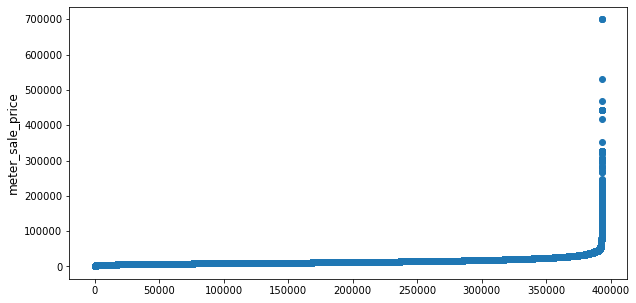

In [72]:
plt.figure(figsize=(10, 5))
plt.scatter(range(df_train.shape[0]), np.sort(df_train.meter_sale_price.values))
plt.ylabel('meter_sale_price', fontsize=12)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_7392\433562314.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['meter_sale_price'].loc[df_train['meter_sale_price'] < lower_limit] = lower_limit


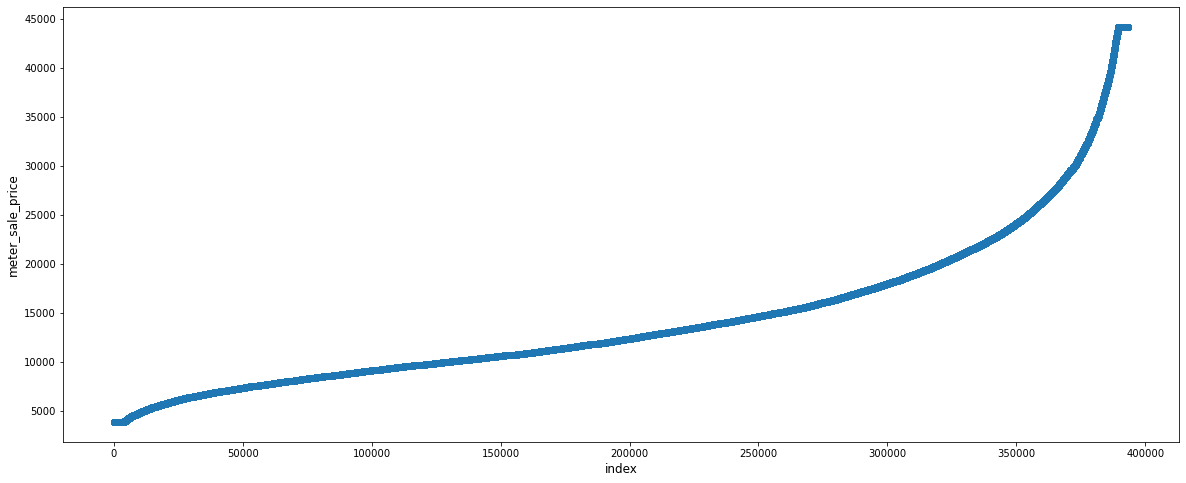

In [73]:
upper_limit = np.percentile(df_train.meter_sale_price.values, 99)
lower_limit = np.percentile(df_train.meter_sale_price.values, 1)
df_train['meter_sale_price'].loc[df_train['meter_sale_price'] > upper_limit] = upper_limit
df_train['meter_sale_price'].loc[df_train['meter_sale_price'] < lower_limit] = lower_limit
plt.figure(figsize=(20, 8))
plt.scatter(range(df_train.shape[0]), np.sort(df_train.meter_sale_price.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('meter_sale_price', fontsize=12)
plt.show()

# Part 3 : Univariate Analysis  

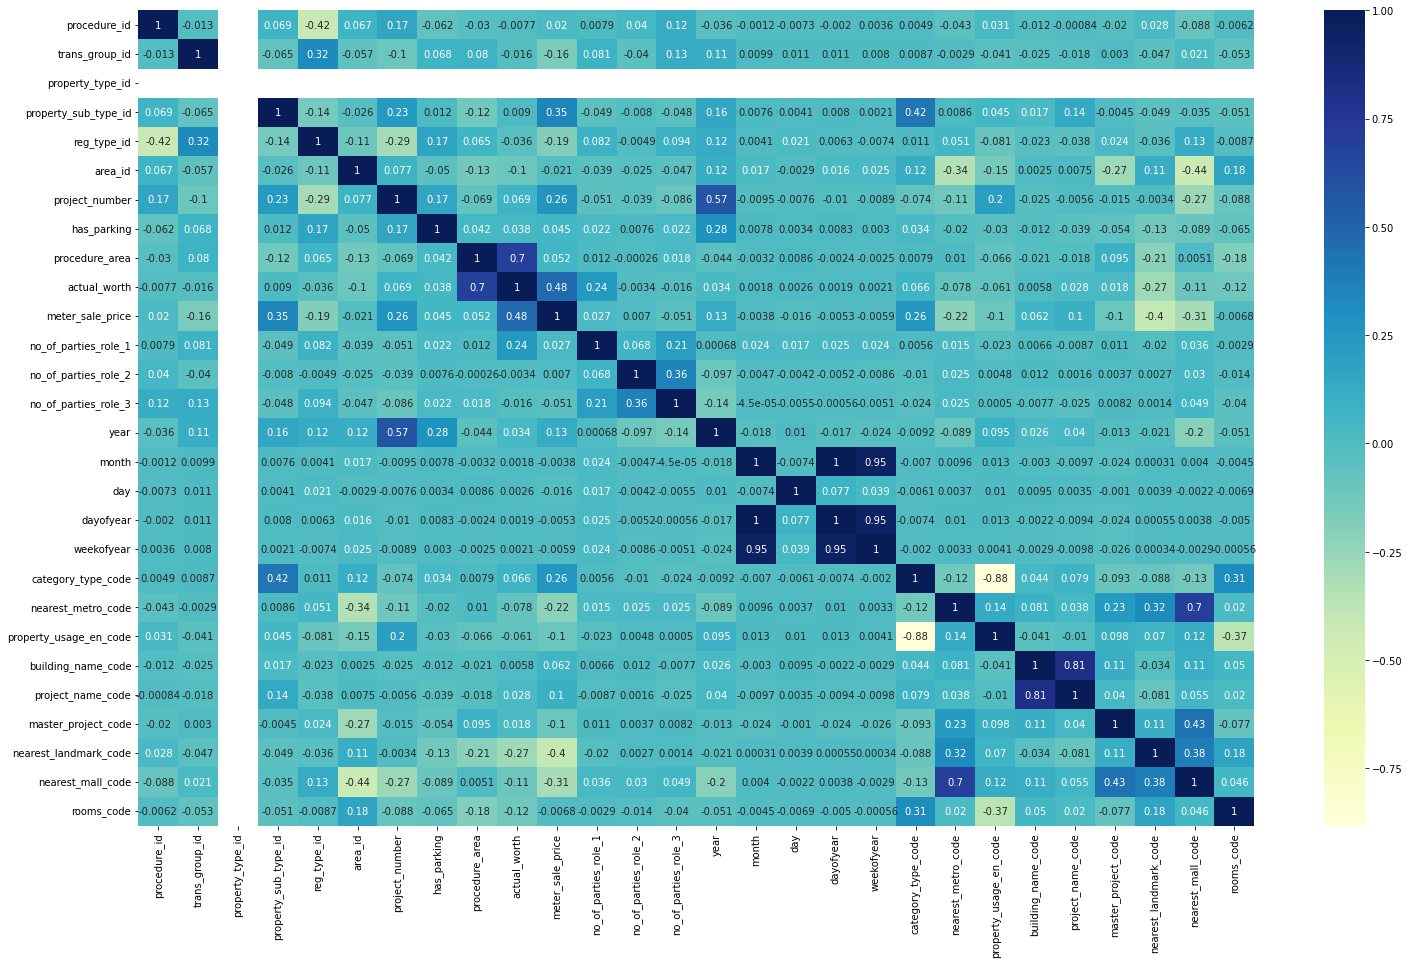

In [74]:
plt.figure(figsize=(25,15))
sns.heatmap(df_train.corr(), annot = True , cmap = 'YlGnBu')
plt.show()

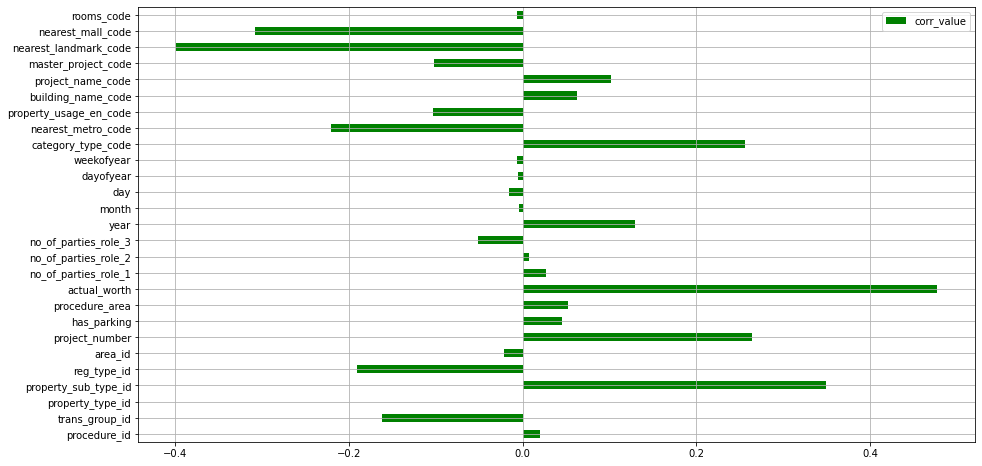

In [75]:
data_dict = {'label' : [] , 
'corr_value' : []}

for col in df_train.columns :
    if col not in ['meter_sale_price', 'instance_date'] :
        label = col
        corr_value = df_train[col].corr(df_train['meter_sale_price'])
        data_dict['label'].append(label)
        data_dict['corr_value'].append(corr_value)

        
corr_df = pd.DataFrame(data_dict , index = data_dict['label'], columns = ['corr_value'] )
#corr_df

corr_df.plot(kind ='barh' , figsize=(15,8) , color ='g')
plt.grid()
plt.show()
    
    

In [76]:
corr_df

,corr_value
procedure_id,0.020433
trans_group_id,-0.161485
property_type_id,NaN
property_sub_type_id,0.349807
reg_type_id,-0.190298
area_id,-0.021362
project_number,0.264548
has_parking,0.045101
procedure_area,0.051837
actual_worth,0.477392


In [77]:
col_to_choose = corr_df.loc[(corr_df['corr_value'] < -0.18) | (corr_df['corr_value'] > 0.2) ]

In [78]:
col_to_choose

,corr_value
property_sub_type_id,0.349807
reg_type_id,-0.190298
project_number,0.264548
actual_worth,0.477392
category_type_code,0.256254
nearest_metro_code,-0.220505
nearest_landmark_code,-0.398632
nearest_mall_code,-0.308028


In [79]:
df_train.project_number.dtype , df_train.actual_worth.dtype 

(dtype('float64'), dtype('float64'))

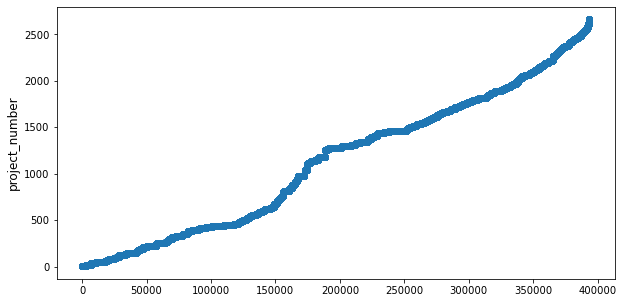

array([4.630e+02, 4.470e+02, 8.170e+02, 1.597e+03, 4.430e+02, 6.230e+02,
       1.819e+03, 1.818e+03, 2.065e+03, 1.141e+03, 1.328e+03, 1.338e+03,
       1.443e+03, 1.680e+03, 2.318e+03, 1.864e+03, 5.050e+02, 1.400e+02,
       1.103e+03, 1.514e+03, 9.320e+02, 6.370e+02, 1.302e+03, 4.600e+01,
       3.980e+02, 1.660e+03, 1.271e+03, 1.456e+03, 4.800e+02, 5.670e+02,
       4.400e+01, 1.290e+02, 1.550e+02, 4.200e+01, 4.160e+02, 3.510e+02,
       3.340e+02, 6.220e+02, 5.400e+01, 9.200e+01, 1.887e+03, 1.580e+03,
       1.826e+03, 3.420e+02, 2.080e+02, 1.617e+03, 2.200e+01, 1.336e+03,
       9.000e+00, 1.506e+03, 1.260e+03, 2.276e+03, 2.970e+02, 1.345e+03,
       4.300e+02, 1.404e+03, 3.900e+02, 8.500e+01, 1.420e+02, 4.190e+02,
       6.380e+02, 3.400e+01, 9.760e+02, 1.276e+03, 2.010e+02, 1.783e+03,
       1.312e+03, 8.830e+02, 3.890e+02, 1.914e+03, 4.360e+02, 1.130e+03,
       1.275e+03, 2.270e+02, 1.461e+03, 7.240e+02, 2.359e+03, 8.180e+02,
       3.520e+02, 2.201e+03, 1.505e+03, 1.427e+03, 

In [80]:
plt.figure(figsize=(10, 5))
plt.scatter(range(df_train.shape[0]), np.sort(df_train.project_number.values))
plt.ylabel('project_number', fontsize=12)
plt.show()
df_train['project_number'].unique()

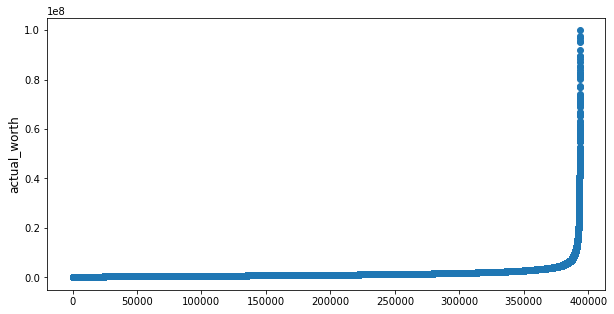

array([ 796970.,  519000., 1250000., ...,  962800., 1451948., 1562505.])

In [81]:
plt.figure(figsize=(10, 5))
plt.scatter(range(df_train.shape[0]), np.sort(df_train.actual_worth.values))
plt.ylabel('actual_worth', fontsize=12)
plt.show()
df_train['actual_worth'].unique()

In [82]:
upper_limit = np.percentile(df_train.actual_worth.values, 99)
lower_limit = np.percentile(df_train.actual_worth.values, 1)
df_train['actual_worth'].loc[df_train['actual_worth'] > upper_limit] = upper_limit
df_train['actual_worth'].loc[df_train['actual_worth'] < lower_limit] = lower_limit

C:\Users\PC\AppData\Local\Temp\ipykernel_7392\3759582638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['actual_worth'].loc[df_train['actual_worth'] < lower_limit] = lower_limit


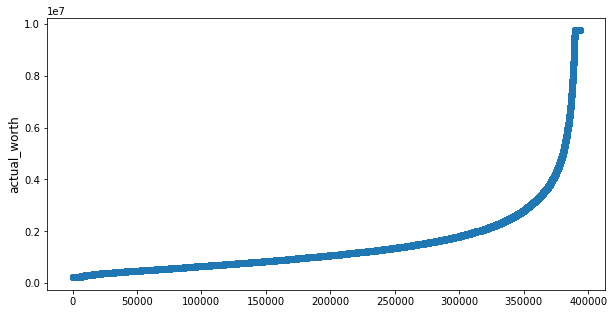

In [83]:
plt.figure(figsize=(10, 5))
plt.scatter(range(df_train.shape[0]), np.sort(df_train.actual_worth.values))
plt.ylabel('actual_worth', fontsize=12)
plt.show()

In [84]:
#sns.boxplot(data = dataframe , x='actual_worth' , y='meter_sale_price')

# Part 4 : Forecasting Model 

# 4_1 spliting data

In [85]:
df_train = df_train.set_index('instance_date')

In [86]:
df_train.head()

,procedure_id,trans_group_id,property_type_id,property_sub_type_id,reg_type_id,area_id,project_number,has_parking,procedure_area,actual_worth,...,weekofyear,category_type_code,nearest_metro_code,property_usage_en_code,building_name_code,project_name_code,master_project_code,nearest_landmark_code,nearest_mall_code,rooms_code
instance_date,,,,,,,,,,,,,,,,,,,,,
2008-12-18,11,1,3,60.0,1,350,463.0,1,137.45,796970.0,...,51,0,21.0,6,2507.0,1523.0,105.0,1.0,4.0,1.0
2010-10-03,11,1,3,60.0,1,485,447.0,1,47.65,519000.0,...,39,0,21.0,6,2774.0,1744.0,100.0,13.0,4.0,15.0
2014-06-16,110,1,3,60.0,1,330,817.0,1,77.81,1250000.0,...,25,0,42.0,6,1922.0,1053.0,83.0,1.0,4.0,0.0
2015-10-02,102,1,3,60.0,0,447,1597.0,1,199.77,3655888.0,...,40,0,19.0,6,2779.0,1751.0,163.0,5.0,1.0,2.0
2015-11-16,102,1,3,112.0,0,526,443.0,1,46.53,1300000.0,...,47,2,16.0,2,942.0,572.0,42.0,3.0,1.0,15.0


In [87]:
X = df_train.drop(['meter_sale_price'], axis=1)
y = df_train[['meter_sale_price']]  

In [88]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [89]:
len(X_train)/len(X) , len(X_test)/len(X), len(X) , len(X_train) , len(X_test)

(0.7999984750363449, 0.20000152496365503, 393452, 314761, 78691)

# Cross Validation (KFold)

In [248]:
cv = KFold(5)

In [249]:
#model 1
reg1 = xgb.XGBRegressor(n_estimators = 1000 , max_depth = 5 , learning_rate = 0.1)
cross_val_score(reg1, X_train , y_train , cv = cv)

array([0.99594472, 0.99661203, 0.99563164, 0.99655916, 0.99689004])

In [252]:
accuracy_model_1 = np.mean([0.99594472, 0.99661203, 0.99563164, 0.99655916, 0.99689004])
accuracy_model_1

0.996327518

In [253]:
#model 2
reg2 = xgb.XGBRegressor(n_estimators = 1000 , max_depth = 5 , learning_rate = 0.01)
cross_val_score(reg2, X_train , y_train , cv = cv)

array([0.99358414, 0.99392941, 0.99311063, 0.99437426, 0.99454902])

In [254]:
accuracy_model_2 = np.mean([0.99358414, 0.99392941, 0.99311063, 0.99437426, 0.99454902])
accuracy_model_2

0.9939094919999999

In [255]:
#model 3
reg3 = xgb.XGBRegressor(n_estimators = 1000 , max_depth = 7 , learning_rate = 0.1)
cross_val_score(reg3, X_train , y_train , cv = cv)

array([0.99615241, 0.9968344 , 0.99598829, 0.99685092, 0.99743185])

In [256]:
accuracy_model_3 = np.mean([0.99615241, 0.9968344 , 0.99598829, 0.99685092, 0.99743185])
accuracy_model_3

0.996651574

In [257]:
#model 4
reg4 = xgb.XGBRegressor(n_estimators = 1000 , max_depth = 7 , learning_rate = 0.01)
cross_val_score(reg4, X_train , y_train , cv = cv)

array([0.99551514, 0.99622823, 0.9951395 , 0.99634542, 0.99645966])

In [258]:
accuracy_model_4 = np.mean([0.99551514, 0.99622823, 0.9951395 , 0.99634542, 0.99645966])
accuracy_model_4

0.9959375899999999

In [259]:
#model 5
reg5 = xgb.XGBRegressor(n_estimators = 1000 , max_depth = 10 , learning_rate = 0.1)
cross_val_score(reg5, X_train , y_train , cv = cv)

array([0.99639108, 0.9969971 , 0.99611618, 0.99706439, 0.99750008])

In [260]:
accuracy_model_5 = np.mean([0.99639108, 0.9969971 , 0.99611618, 0.99706439, 0.99750008])
accuracy_model_5

0.996813766

In [261]:
#model 6
reg6 = xgb.XGBRegressor(n_estimators = 1000 , max_depth = 10 , learning_rate = 0.01)
cross_val_score(reg6, X_train , y_train , cv = cv)

array([0.9964088 , 0.99707497, 0.99613091, 0.99720263, 0.99754958])

In [262]:
accuracy_model_6 = np.mean([0.9964088 , 0.99707497, 0.99613091, 0.99720263, 0.99754958])
accuracy_model_6

0.9968733779999999

In [278]:
best_score = {'label' : ['accuracy_model_1' , 'accuracy_model_2', 'accuracy_model_3', 'accuracy_model_4', 
                         'accuracy_model_5', 'accuracy_model_6'] ,
    'score' : [accuracy_model_1 , accuracy_model_2, accuracy_model_3, accuracy_model_4, 
                         accuracy_model_5, accuracy_model_6]}
best_score = pd.DataFrame(best_score )
best_score

,label,score
0,accuracy_model_1,0.996328
1,accuracy_model_2,0.993909
2,accuracy_model_3,0.996652
3,accuracy_model_4,0.995938
4,accuracy_model_5,0.996814
5,accuracy_model_6,0.996873


The model 6 is the best 

In [90]:
reg = xgb.XGBRegressor(n_estimators = 1000 , max_depth = 10 , learning_rate = 0.01)
reg.fit(X_train , y_train , eval_set = [(X_train, y_train), (X_test, y_test)] , verbose = 100)

[0]	validation_0-rmse:16235.02646	validation_1-rmse:16275.44772
[100]	validation_0-rmse:5992.00682	validation_1-rmse:6010.35645
[200]	validation_0-rmse:2243.40440	validation_1-rmse:2261.35495
[300]	validation_0-rmse:902.76541	validation_1-rmse:942.59136
[400]	validation_0-rmse:474.67279	validation_1-rmse:551.25321
[500]	validation_0-rmse:360.28809	validation_1-rmse:464.29872
[600]	validation_0-rmse:320.88198	validation_1-rmse:443.35346
[700]	validation_0-rmse:299.67793	validation_1-rmse:437.42923
[800]	validation_0-rmse:278.93974	validation_1-rmse:432.30444
[900]	validation_0-rmse:262.72494	validation_1-rmse:428.54997
[999]	validation_0-rmse:247.79675	validation_1-rmse:424.75732


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [91]:
y_predict = reg.predict(X_test)
y_predict = pd.DataFrame(y_predict , index = y_test.index, 
                         columns = ['meter_sale_price_predicted'])

In [92]:
y_predict.head()

,meter_sale_price_predicted
instance_date,
2023-01-03,32923.167969
2009-12-30,15117.756836
2019-10-04,14488.831055
2009-09-04,24748.849609
2022-07-20,8590.089844


In [93]:
y_test.head()

,meter_sale_price
instance_date,
2023-01-03,32829.88
2009-12-30,15068.94
2019-10-04,14481.62
2009-09-04,24549.14
2022-07-20,8551.32


# Score of prediction 

In [94]:
reg.score(X_test , y_test)

0.9970789719418274

# MSE and MAE

In [95]:
mse = mean_squared_error(y_test , y_predict)
mae = mean_absolute_error(y_test , y_predict)
mse , mae

(180418.78489225882, 76.4036645513086)

# Features impotances

In [96]:
fi = pd.DataFrame(data=reg.feature_importances_ , index = reg.feature_names_in_, columns=["importances of features_train"])
fi.sort_values("importances of features_train")

,importances of features_train
property_type_id,0.000000
no_of_parties_role_1,0.000514
procedure_id,0.000518
month,0.000574
no_of_parties_role_2,0.000687
day,0.000941
dayofyear,0.001083
no_of_parties_role_3,0.001126
weekofyear,0.001238
has_parking,0.001700


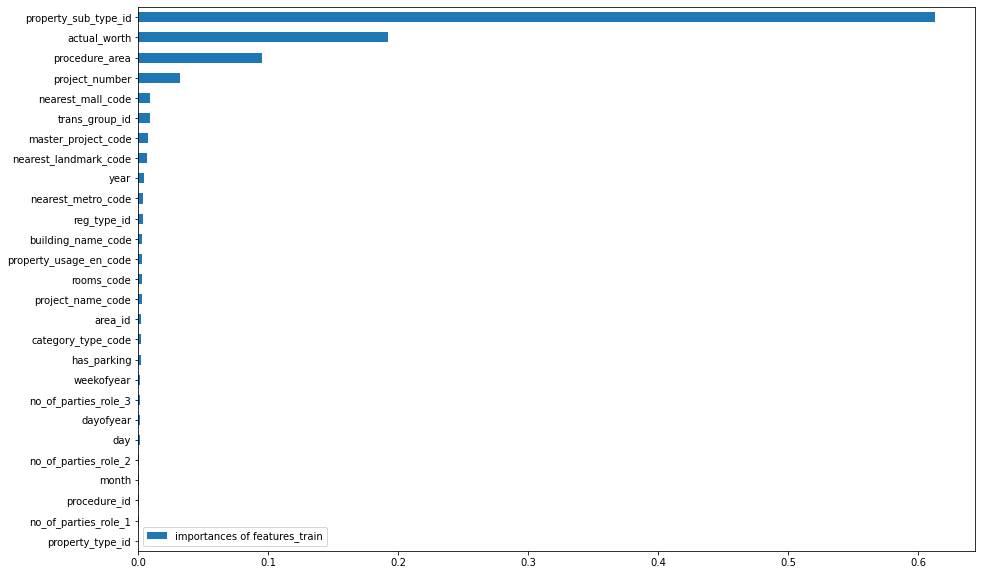

In [97]:
fi.sort_values("importances of features_train").plot(kind="barh", figsize=(15,10))
plt.show()

# Visualize your Prediction Data

In [129]:
def pred_Visualization(area , category_type, reg_type , year):
    
    agg = df_object_coded.groupby(['category_type'])
    
    data_dict = {'instance_date' : []}
    
    for col in X_test.columns : 
        data_dict[col] = []

    
    for i in range(0, len(df_object_coded['area_name_en'].unique())):
        if df_object_coded['area_name_en'].unique()[i] == area :
            area_id = df_object_coded['area_id'].unique()[i]
            
    for i in range(0, len(df_object_coded['category_type'].unique())):
        if df_object_coded['category_type'].unique()[i] == category_type :
            category_type_code = df_object_coded['category_type_code'].unique()[i]
            
    for i in range(0, len(df_object_coded['reg_type_en'].unique())):
        if df_object_coded['reg_type_en'].unique()[i] == reg_type :
            reg_type_id = df_object_coded['reg_type_id'].unique()[i]
            
    list_date = pd.date_range(f'{year}-01-01', f'{year}-12-31') 
    
    for date in list_date :
        
        instance_date = date
        data_dict['instance_date'].append(instance_date)
        
        procedure_id = random.choice(df_object_coded['procedure_id'].unique())
        data_dict['procedure_id'].append(procedure_id)
        
        trans_group_id = random.choice(df_object_coded['trans_group_id'].unique())  
        data_dict['trans_group_id'].append(trans_group_id)
        
        property_type_id = random.choice(df_object_coded['property_type_id'].unique())
        data_dict['property_type_id'].append(property_type_id)
        
        property_sub_type_id = random.choice(df_object_coded['property_sub_type_id'].unique()[1:])
        data_dict['property_sub_type_id'].append(property_sub_type_id)
        
        reg_type_id = reg_type_id
        data_dict['reg_type_id'].append(reg_type_id)
        
        area_id = area_id
        data_dict['area_id'].append(area_id)
        
        project_number = random.choice(df_object_coded['project_number'].unique()[1:])
        data_dict['project_number'].append(project_number)
        
        has_parking = random.choice(df_object_coded['has_parking'].unique())
        data_dict['has_parking'].append(has_parking)
        
        procedure_area = random.choice(df_object_coded['procedure_area'].unique())
        data_dict['procedure_area'].append(procedure_area)
        
        get_group = agg.get_group((category_type))
        list_actual_worth = list(get_group['actual_worth'].unique())
        actual_worth = random.choice(list_actual_worth[:67] + list_actual_worth[68:])
        data_dict['actual_worth'].append(actual_worth)

        no_of_parties_role_1 = random.choice(df_object_coded['no_of_parties_role_1'].unique())
        data_dict['no_of_parties_role_1'].append(no_of_parties_role_1)
        
        no_of_parties_role_2 = random.choice(df_object_coded['no_of_parties_role_2'].unique())
        data_dict['no_of_parties_role_2'].append(no_of_parties_role_2)
        
        list_no_of_parties_role_3 = df_object_coded['no_of_parties_role_3'].unique()
        no_of_parties_role_3 = random.choice(list(list_no_of_parties_role_3[:5]) + list(list_no_of_parties_role_3[6:]))
        data_dict['no_of_parties_role_3'].append(no_of_parties_role_3)
        
        year = date.year
        data_dict['year'].append(year)
        
        month = date.month
        data_dict['month'].append(month)
        
        day = date.day
        data_dict['day'].append(day)
        
        dayofyear = date.timetuple().tm_yday
        data_dict['dayofyear'].append(dayofyear)
        
        weekofyear = date.isocalendar().week
        data_dict['weekofyear'].append(weekofyear)
        
        category_type_code = category_type_code
        data_dict['category_type_code'].append(category_type_code)
        
        property_usage_en_id = random.choice(df_object_coded['property_usage_en_code'].unique())
        data_dict['property_usage_en_code'].append(property_usage_en_id)
        
        building_name_code = random.choice(df_object_coded['building_name_code'].unique()[1:])
        data_dict['building_name_code'].append(building_name_code)
        
        project_name_code = random.choice(df_object_coded['project_name_code'].unique()[1:])
        data_dict['project_name_code'].append(project_name_code)
        
        master_project_code = random.choice(df_object_coded['master_project_code'].unique()[1:])
        data_dict['master_project_code'].append(master_project_code)
        
        list_nearest_landmark_code = df_object_coded['nearest_landmark_code'].unique()
        nearest_landmark_code = random.choice(list(list_nearest_landmark_code[:4]) + list(list_nearest_landmark_code[5:]))
        data_dict['nearest_landmark_code'].append(nearest_landmark_code)
        
        list_nearest_metro_code = df_object_coded['nearest_metro_code'].unique()
        nearest_metro_code = random.choice(list(list_nearest_metro_code[:6]) + list(list_nearest_metro_code[7:]))
        data_dict['nearest_metro_code'].append(nearest_metro_code)
        
        list_nearest_mall_code = df_object_coded['nearest_mall_code'].unique()
        nearest_mall_code = random.choice(list(list_nearest_mall_code[:3]) + list(list_nearest_mall_code[4:]))
        data_dict['nearest_mall_code'].append(nearest_mall_code)
        
        rooms_code = random.choice(df_object_coded['rooms_code'].unique()[1:])
        data_dict['rooms_code'].append(rooms_code)
        
        
    data_prediction = pd.DataFrame(data_dict) 
    data_prediction = data_prediction.set_index('instance_date')
    target_pred = reg.predict(data_prediction)  
    target_pred = pd.DataFrame(target_pred , index = data_prediction.index , columns = ['meter_sale_price_predicted'])
    
    target_pred['instance_date'] = target_pred.index
    target_pred['weekofyear'] = target_pred['instance_date'].dt.weekofyear
    DF = target_pred.groupby(['weekofyear'])
    pred = {'weekofyear' : [] , 'meter_sale_price_predicted' : [] }
    for weekofyear in range(1,max(target_pred['weekofyear'].unique()) + 1):
        DFF= DF.get_group((weekofyear))
        mean = DFF['meter_sale_price_predicted'].mean()
        pred['weekofyear'].append(weekofyear)
        pred['meter_sale_price_predicted'].append(mean)
        
    #This the final data    
    pred = pd.DataFrame(data = pred , index = pred['weekofyear'] , columns = ['meter_sale_price_predicted'] )
    
    
    return pred.plot(figsize=(15,8)) #PLOTTING THIS pred (final data)
        
    








# Test

C:\Users\PC\AppData\Local\Temp\ipykernel_7392\3088710858.py:124: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  target_pred['weekofyear'] = target_pred['instance_date'].dt.weekofyear


<AxesSubplot:>

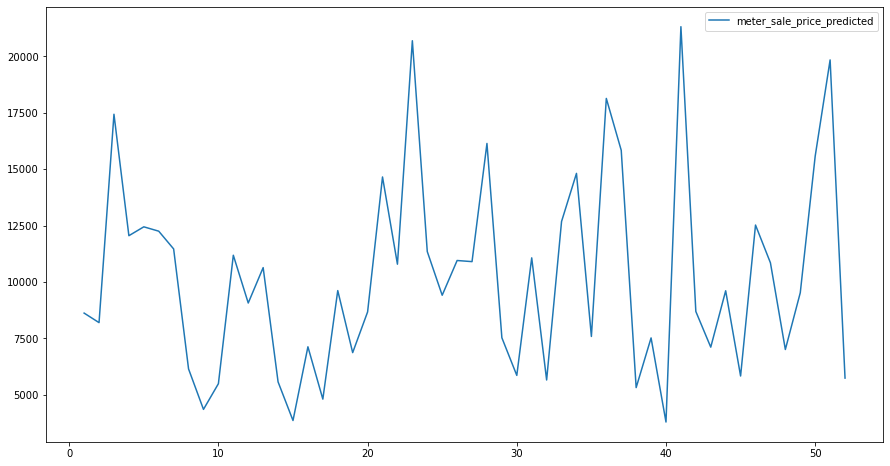

In [130]:
pred_Visualization('Al Merkadh' , 'Villa', 'Off-Plan Properties' , 2024)